Experimentation. From the (Equidistribution theorem)[https://en.wikipedia.org/wiki/Equidistribution_theorem], the sequence $\{(k \cdot a) \text{ mod } 1\}_{k = 1}^{\infty}$ where $a$ is an irrational number is uniformly distributed (on the circle $\mathbb{R}/\mathbb{Z}$). This is cool however, not great for computers because dealing with irrational numbers means dealing with infinite precision and that's not feasible. However, this led me to think: when does the sequence repeat if $a$ is not irrational (commonly: rational)? 

First, it's trivial to see that if $a$ is irrational, then there are no two terms in the sequence that are the same: If $k \cdot a \equiv_1 k' \cdot a \implies (k - k')a \equiv_1 0 \implies (k - k')a$ is an integer. This only happens if $k - k' = 0$ so no repeats OR $a$ is not irrational but this is a contradiction. Therefore, $k = k' \implies$ no repeats $\blacksquare$

Now, for the fun part, trying finite precision with this sequence to check for repeats. As establised in lecture, everyone's favorite irrational is $\sqrt{2}$ therefore, $a = \sqrt{2}$. I start with $1.4$ and go to $1.4142135623$. 

In [6]:
import math

def f(a):
    i, s = 1, set()

    while True: 
        t = (a * i) - math.floor(a * i)
        if t in s: break
        s.add(t)
        i += 1
    print(a, "at", i, "with", t)
    return i

f(1.4)
f(1.41)
f(1.414)
f(1.4142)
f(1.41421)
f(1.414213)
f(1.4142135)
f(1.41421356)
f(1.414213562)
f(1.4142135623)


1.4 at 8 with 0.1999999999999993
1.41 at 117 with 0.9699999999999989
1.414 at 509 with 0.7259999999999991
1.4142 at 5453 with 0.6325999999999112
1.41421 at 100237 with 0.16777000000001863
1.414213 at 1001813 with 0.9681689999997616
1.4142135 at 2000389 with 0.1290515000000596
1.41421356 at 25013227 with 0.8027581200003624
1.414213562 at 47453137 with 0.9048440009355545
1.4142135623 at 27135970 with 0.8001659363508224


This takes a bit of time to run but here's a copy of the results: 
```
1.4 at 8 with 0.1999999999999993
1.41 at 117 with 0.9699999999999989
1.414 at 509 with 0.7259999999999991
1.4142 at 5453 with 0.6325999999999112
1.41421 at 100237 with 0.16777000000001863
1.414213 at 1001813 with 0.9681689999997616
1.4142135 at 2000389 with 0.1290515000000596
1.41421356 at 25013227 with 0.8027581200003624
1.414213562 at 47453137 with 0.9048440009355545
1.4142135623 at 27135970 with 0.8001659363508224
```

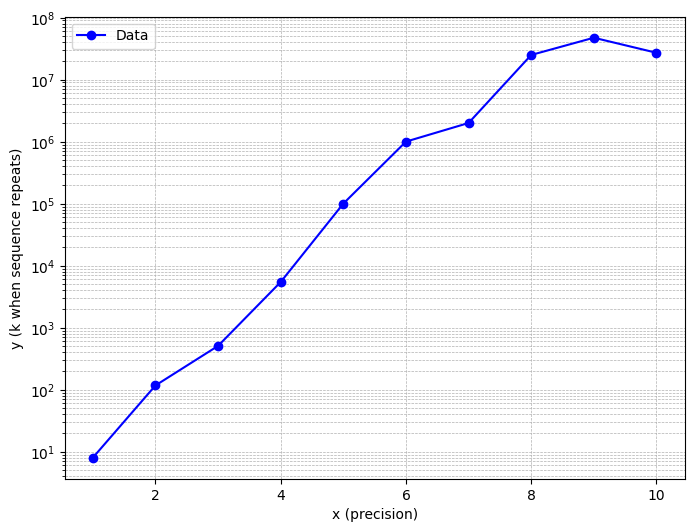

In [15]:
import matplotlib.pyplot as plt

x = list(range(1, 11))
y = [8, 117, 509, 5453, 100237, 1001813, 2000389, 25013227, 47453137, 27135970]

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data')

plt.yscale('log')

plt.ylabel('y (k when sequence repeats)')
plt.xlabel('x (precision)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


plt.show()

Pretty interesting. I was curious so I looked up this sequence on OEIS (https://oeis.org/search?q=0%2C+8%2C+117%2C+509%2C+5453%2C+100237%2C+1001813%2C+2000389%2C+25013227%2C+47453137%2C+27135970&language=english&go=Search) and I got 0 hits. I'll do this for $\pi, \phi,$ and $\sqrt{5}$ in the following graph: 

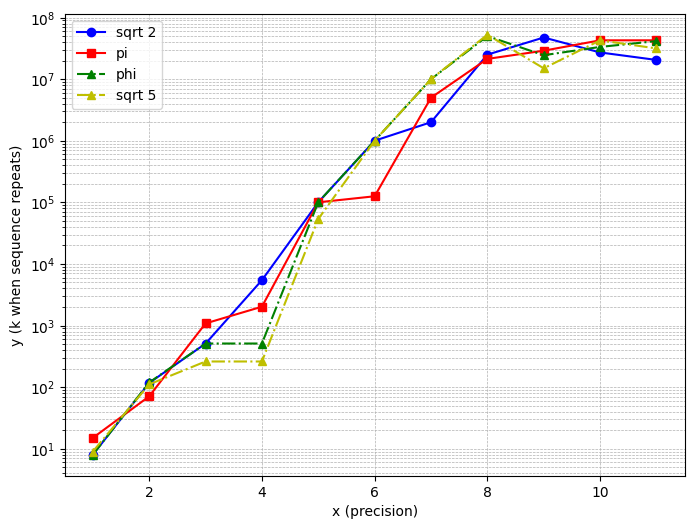

In [27]:
import matplotlib.pyplot as plt

x = list(range(1, 12))
a_s = ["1.41421356237", "3.14159265358", "1.61803398874", "2.23606797749"] 

y_sqrt2 = [8, 117, 509, 5453, 100237, 1001813, 2000389, 25013227, 47453137, 27135970, 20503105]

a = a_s[1]
# y_pi = [f(float(a[:2 + i])) for i in range(1, 12)]
y_pi = [15, 71, 1083, 2023, 100219, 125537, 5002469, 21335202, 28974543, 42722837, 42722833]

a = a_s[2]
# y_phi = [f(float(a[:2 + i])) for i in range(1, 12)]
y_phi = [8, 119, 511, 511, 100553, 1001177, 10002643, 50014457, 24478969, 33364866, 41475577]

a = a_s[3]
# y_sqrt5 = [f(float(a[:2 + i])) for i in range(1, 12)]
y_sqrt5 = [9, 111, 261, 261, 53731, 1001453, 10004003, 52645745, 15006002, 42639076, 31531503]

# I was originally computing it every time I tried to plot this but it was frustrating
# for it to finish computing and then fail because I messed up the plotting
# so I decided to just hardcode the values. 

plt.figure(figsize=(8, 6))

plt.plot(x, y_sqrt2, marker='o', linestyle='-', color='b', label='sqrt 2')
plt.plot(x, y_pi, marker='s', linestyle='-', color='r', label='pi')
plt.plot(x, y_phi, marker='^', linestyle='-.', color='g', label='phi')
plt.plot(x, y_sqrt5, marker='^', linestyle='-.', color='y', label='sqrt 5')

plt.yscale('log')

plt.ylabel('y (k when sequence repeats)')
plt.xlabel('x (precision)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

The plateuing in the end *might* be genuine but I'm almost certain it's python's float type reaching its upper precision limit.